# Exploratory Spatial and Temporal Data Analysis (ESTDA)



In [1]:
import matplotlib
import numpy as np
import pysal as ps
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
f = ps.open(ps.examples.get_path('usjoin.csv'), 'r')

To determine what is in the file, check the `header` attribute on the file object:

In [3]:
f.header

['Name',
 'STATE_FIPS',
 '1929',
 '1930',
 '1931',
 '1932',
 '1933',
 '1934',
 '1935',
 '1936',
 '1937',
 '1938',
 '1939',
 '1940',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009']

Ok, lets pull in the `name` variable to see what we have.

In [4]:
name = f.by_col('Name')

In [5]:
name

['Alabama',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

Now obtain per capital incomes in 1929 which is in the column associated with `1929`.

In [6]:
y1929 = f.by_col('1929')

In [7]:
y1929[:10]

[323, 600, 310, 991, 634, 1024, 1032, 518, 347, 507]

And now 2009

In [8]:
y2009 = f.by_col("2009")

In [9]:
y2009[:10]

[32274, 32077, 31493, 40902, 40093, 52736, 40135, 36565, 33086, 30987]

These are read into regular Python lists which are not particularly well suited to efficient data analysis. So let's convert them to numpy arrays.

In [10]:
y2009 = np.array(y2009)

In [11]:
y2009

array([32274, 32077, 31493, 40902, 40093, 52736, 40135, 36565, 33086,
       30987, 40933, 33174, 35983, 37036, 31250, 35151, 35268, 47159,
       49590, 34280, 40920, 29318, 35106, 32699, 37057, 38009, 41882,
       48123, 32197, 46844, 33564, 38672, 35018, 33708, 35210, 38827,
       41283, 30835, 36499, 33512, 35674, 30107, 36752, 43211, 40619,
       31843, 35676, 42504])

Much better. But pulling these in and converting them a column at a time is tedious and error prone. So we will do all of this in a list comprehension.

In [12]:
Y = np.array( [ f.by_col(str(year)) for year in range(1929,2010) ] ) * 1.0

In [13]:
Y.shape

(81, 48)

In [14]:
Y = Y.transpose()

In [15]:
Y.shape

(48, 81)

In [16]:
years = np.arange(1929,2010)

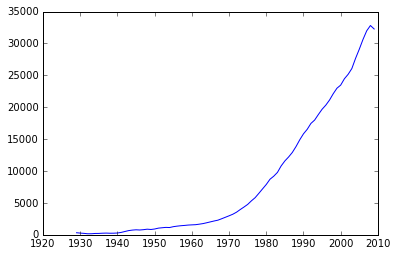

In [17]:
plt.plot(years,Y[0])

In [18]:
RY = Y / Y.mean(axis=0) #relativ per capita incomes

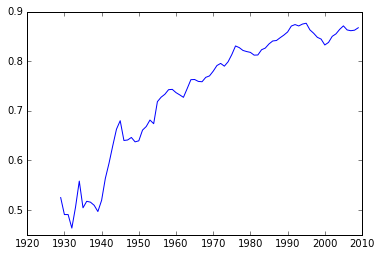

In [19]:
plt.plot(years,RY[0])

In [20]:
name = np.array(name)

In [21]:
np.nonzero(name=='Ohio')

(array([32]),)

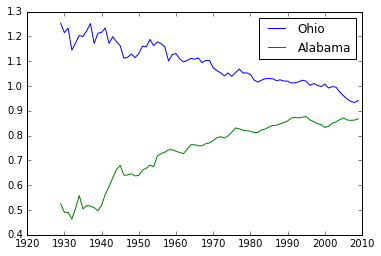

In [22]:
plt.plot(years, RY[32], label='Ohio')
plt.plot(years, RY[0], label='Alabama')
plt.legend()

## Spaghetti Plot

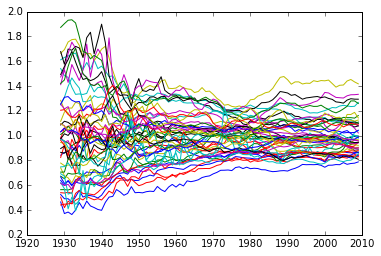

In [23]:
for row in RY:
    plt.plot(years, row)

## Kernel Density (univariate, aspatial)

In [24]:
from scipy.stats.kde import gaussian_kde

In [25]:
density = gaussian_kde(Y[:,0])

In [26]:
Y[:,0]

array([  323.,   600.,   310.,   991.,   634.,  1024.,  1032.,   518.,
         347.,   507.,   948.,   607.,   581.,   532.,   393.,   414.,
         601.,   768.,   906.,   790.,   599.,   286.,   621.,   592.,
         596.,   868.,   686.,   918.,   410.,  1152.,   332.,   382.,
         771.,   455.,   668.,   772.,   874.,   271.,   426.,   378.,
         479.,   551.,   634.,   434.,   741.,   460.,   673.,   675.])

In [27]:
density = gaussian_kde(Y[:,0])

In [28]:
minY0 = Y[:,0].min()*.90
maxY0 = Y[:,0].max()*1.10
x = np.linspace(minY0, maxY0, 100)

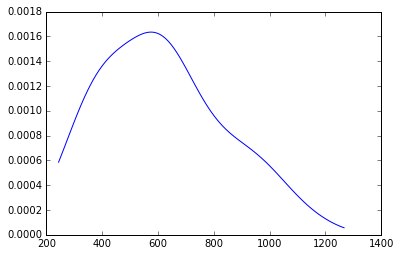

In [29]:
plt.plot(x,density(x))

In [30]:
d2009 = gaussian_kde(Y[:,-1])

In [31]:
minY0 = Y[:,-1].min()*.90
maxY0 = Y[:,-1].max()*1.10
x = np.linspace(minY0, maxY0, 100)

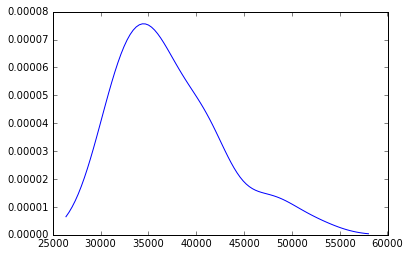

In [32]:
plt.plot(x,d2009(x))

In [33]:
minR0 = RY.min()

In [34]:
maxR0 = RY.max()

In [35]:
x = np.linspace(minR0, maxR0, 100)

In [36]:
d1929 = gaussian_kde(RY[:,0])

In [37]:
d2009 = gaussian_kde(RY[:,-1])

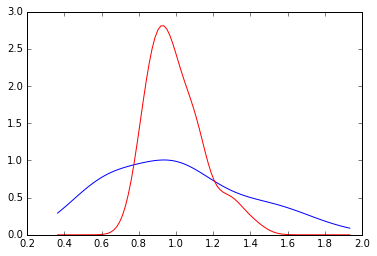

In [38]:
plt.plot(x, d1929(x),c="b")
plt.plot(x, d2009(x),c="r")

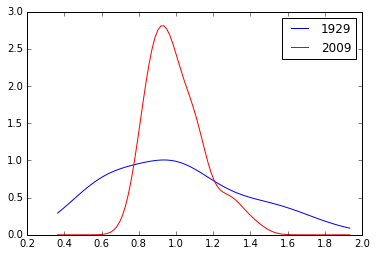

In [39]:
plt.plot(x, d1929(x), label='1929',c="b")
plt.plot(x, d2009(x), label='2009',c="r")
plt.legend()

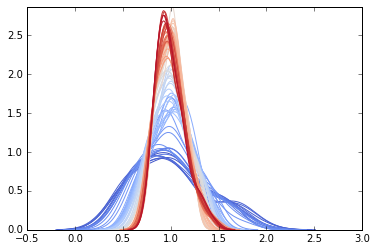

In [40]:
import seaborn as sns
sns.set_palette(sns.color_palette("coolwarm", 2009-1929+1))
for y in range(2010-1929):
    sns.kdeplot(RY[:,y])

### Another way to visualize the dynamics of cross-sectional distributions - Joyplot

> **NOTE**: This material has been ported and adapted from [Joyplot](https://gist.github.com/sjsrey/f98977d78cdcacddc2f6a8891539cb80) by Serge Rey.

In [41]:
from seaborn.distributions import _statsmodels_univariate_kde
# Source http://nbviewer.jupyter.org/gist/ljwolf/37c89ddb704c013debb9d205c3acb25b
def joyplot(data, ax=None, 
            flatten = .1, #rescale the height of each distribution to avoid overlap. If large, will flatten out each of the KDEs
            linecolor='k', 
            shadecolor='w',
            shade=True, 
            line_kws = None,
            kde_kws=None,
            fig_kws=None,
            shade_kws=None):
    line_kws = dict() if line_kws is None else line_kws
    kde_kws = (dict(kernel='gau', bw='scott',
                         gridsize=100, cut=3,
                         clip=None) if kde_kws is None else kde_kws)
    fig_kws = dict(figsize=(5,5)) if fig_kws is None else fig_kws
    shade_kws = (dict(alpha=.75, 
                          clip_on=True, 
                          zorder=1, 
                          color=None) if shade_kws is None else shade_kws)
    if kde_kws.get('clip',None) is None:
        kde_kws['clip'] = (-np.inf, np.inf)
    if ax is None:
        f,ax = plt.subplots(1,1, **fig_kws)
    T,N = data.shape
    dsupport = np.array([])
    for i, row in enumerate(data):
        x,y = _statsmodels_univariate_kde(row, **kde_kws)
        y = np.max(np.c_[np.zeros_like(y), y], axis=1)
        y = y/(flatten*y.max()) + i
        ax.plot(x,y,color=linecolor,**line_kws)
        #print(y)
        if shade:
            if shade_kws.get('color', None) is None:
                shade_kws['color'] = shadecolor
            ax.fill_between(x, i, y, 
                             **shade_kws)
        dsupport = np.concatenate((dsupport, x))
    ax.set_xlim(np.min(dsupport)*.75, np.max(dsupport)*1.25)
    return f,ax

/Users/weikang/anaconda2/envs/workshop/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


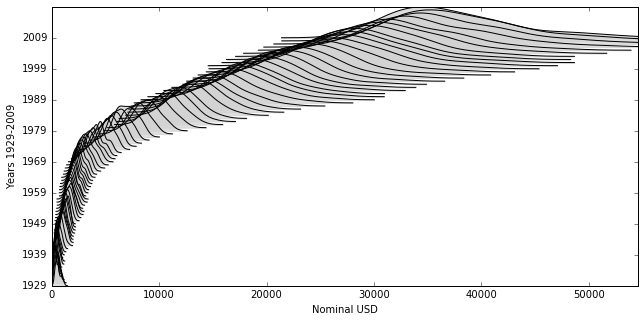

In [42]:
xmin = Y.min()
xmax = Y.max()

f,ax = joyplot(Y.T, shade=True, 
               shadecolor='lightgrey', linecolor='k', 
               fig_kws=dict(figsize=(5*2.1,5))) 
ax.set_xlim(0, xmax)
ax.legend(ncol=2, fontsize=16)
ax.set_ylabel("Years 1929-2009")
ax.set_xlabel("Nominal USD")
ax.set_yticks(range(0,9*10,10))
ax.set_yticklabels(range(1929,2010,10))
plt.show()

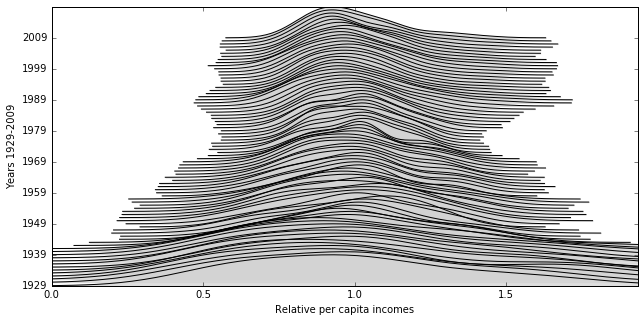

In [43]:
xmin = RY.min()
xmax = RY.max()

f,ax = joyplot(RY.T, shade=True, 
               shadecolor='lightgrey', linecolor='k', 
               fig_kws=dict(figsize=(5*2.1,5))) 
ax.set_xlim(0, xmax)
ax.legend(ncol=2, fontsize=16)
ax.set_ylabel("Years 1929-2009")
ax.set_xlabel("Relative per capita incomes")
ax.set_yticks(range(0,9*10,10))
ax.set_yticklabels(range(1929,2010,10))
plt.show()

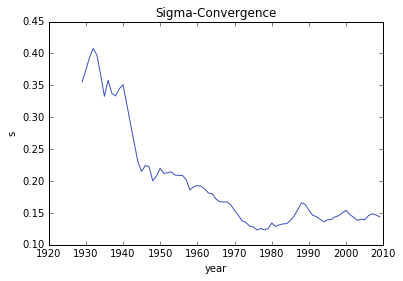

In [44]:
sigma = RY.std(axis=0)
plt.plot(years, sigma)
plt.ylabel('s')
plt.xlabel('year')
plt.title("Sigma-Convergence")

So the distribution is becoming less dispersed over time.

But what about internal mixing? Do poor (rich) states remain poor (rich), or is there movement within the distribuiton over time?

## Markov Chains

In [45]:
c = np.array([
['b','a','c'],
['c','c','a'],
['c','b','c'],
['a','a','b'],
['a','b','c']])

In [46]:
c

array([['b', 'a', 'c'],
       ['c', 'c', 'a'],
       ['c', 'b', 'c'],
       ['a', 'a', 'b'],
       ['a', 'b', 'c']], 
      dtype='|S1')

In [47]:
m = ps.Markov(c)

In [48]:
m.classes

array(['a', 'b', 'c'], 
      dtype='|S1')

In [49]:
m.transitions

array([[ 1.,  2.,  1.],
       [ 1.,  0.,  2.],
       [ 1.,  1.,  1.]])

In [50]:
m.p

matrix([[ 0.25      ,  0.5       ,  0.25      ],
        [ 0.33333333,  0.        ,  0.66666667],
        [ 0.33333333,  0.33333333,  0.33333333]])

### State Per Capita Incomes

In [51]:
ps.examples.explain('us_income')

{'description': 'Per-capita income for the lower 47 US states 1929-2010',
 'explanation': [' * us48.shp: shapefile ',
  ' * us48.dbf: dbf for shapefile',
  ' * us48.shx: index for shapefile',
  ' * usjoin.csv: attribute data (comma delimited file)'],
 'name': 'us_income'}

In [52]:
data = ps.pdio.read_files(ps.examples.get_path("us48.dbf"))
W = ps.queen_from_shapefile(ps.examples.get_path("us48.shp"))
W.transform = 'r'

In [53]:
data.STATE_NAME

0         Washington
1            Montana
2              Maine
3       North Dakota
4       South Dakota
5            Wyoming
6          Wisconsin
7              Idaho
8            Vermont
9          Minnesota
10            Oregon
11     New Hampshire
12              Iowa
13     Massachusetts
14          Nebraska
15          New York
16      Pennsylvania
17       Connecticut
18      Rhode Island
19        New Jersey
20           Indiana
21            Nevada
22              Utah
23        California
24              Ohio
25          Illinois
26          Delaware
27     West Virginia
28          Maryland
29          Colorado
30          Kentucky
31            Kansas
32          Virginia
33          Missouri
34           Arizona
35          Oklahoma
36    North Carolina
37         Tennessee
38             Texas
39        New Mexico
40           Alabama
41       Mississippi
42           Georgia
43    South Carolina
44          Arkansas
45         Louisiana
46           Florida
47          M

In [54]:
f = ps.open(ps.examples.get_path("usjoin.csv"))
pci = np.array([f.by_col[str(y)] for y in range(1929,2010)])
pci.shape

(81, 48)

In [55]:
pci = pci.T

In [56]:
pci.shape

(48, 81)

In [57]:
cnames = f.by_col('Name')

In [58]:
cnames[:10]

['Alabama',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Idaho']

In [59]:
ids = [ cnames.index(name) for name in data.STATE_NAME]

In [60]:
ids[:10]

[44, 23, 16, 31, 38, 47, 46, 9, 42, 20]

In [61]:
pci = pci[ids]
RY = RY[ids]

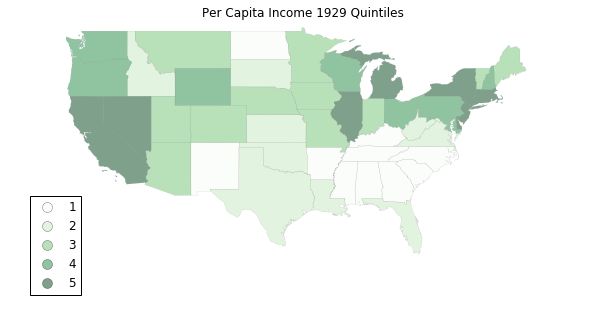

In [62]:
import matplotlib.pyplot as plt

import geopandas as gpd
shp_link = ps.examples.get_path('us48.shp')
tx = gpd.read_file(shp_link)
pci29 = ps.Quantiles(pci[:,0], k=5)
f, ax = plt.subplots(1, figsize=(10, 5))
tx.assign(cl=pci29.yb+1).plot(column='cl', categorical=True, \
        k=5, cmap='Greens', linewidth=0.1, ax=ax, \
        edgecolor='grey', legend=True)
ax.set_axis_off()
plt.title('Per Capita Income 1929 Quintiles')

plt.show()

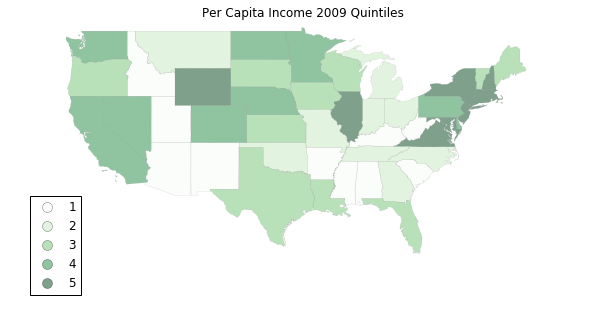

In [63]:
pci2009 = ps.Quantiles(pci[:,-1], k=5)
f, ax = plt.subplots(1, figsize=(10, 5))
tx.assign(cl=pci2009.yb+1).plot(column='cl', categorical=True, \
        k=5, cmap='Greens', linewidth=0.1, ax=ax, \
        edgecolor='grey', legend=True)
ax.set_axis_off()
plt.title('Per Capita Income 2009 Quintiles')
plt.show()

## Generate a time series of the maps at a 10-year interval

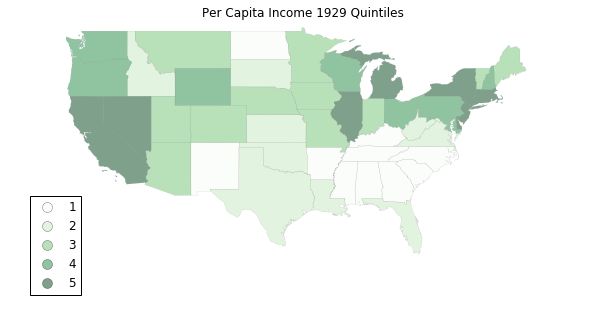

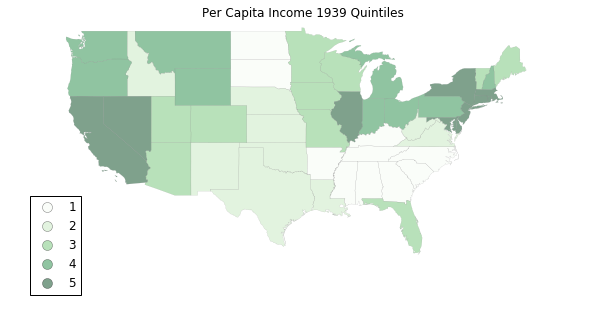

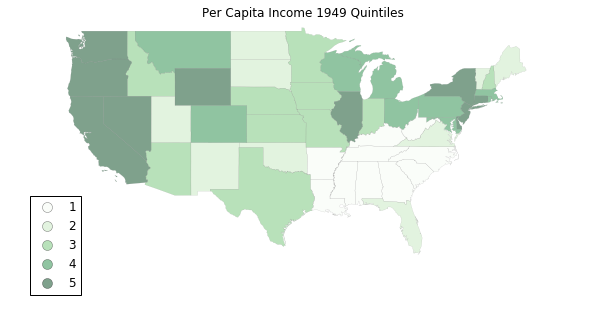

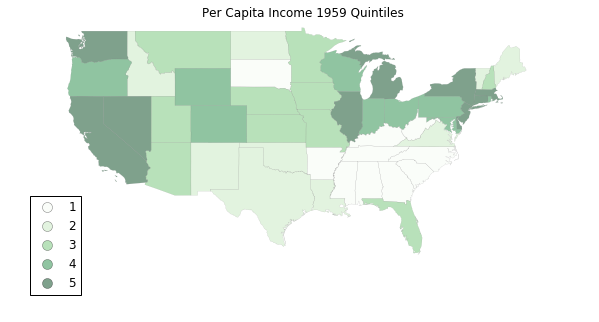

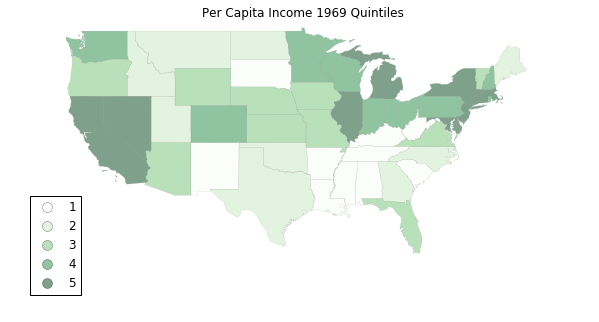

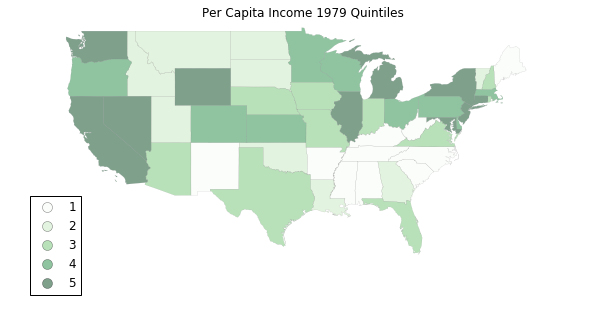

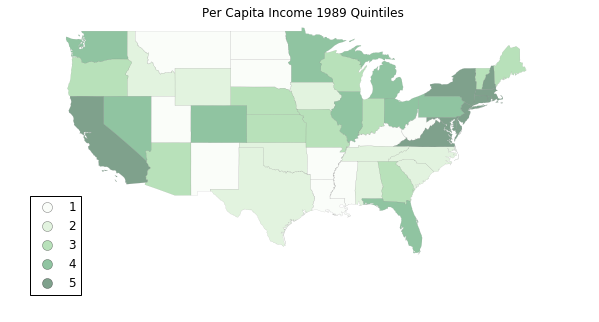

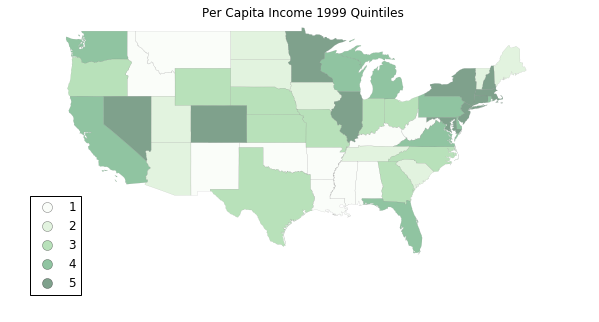

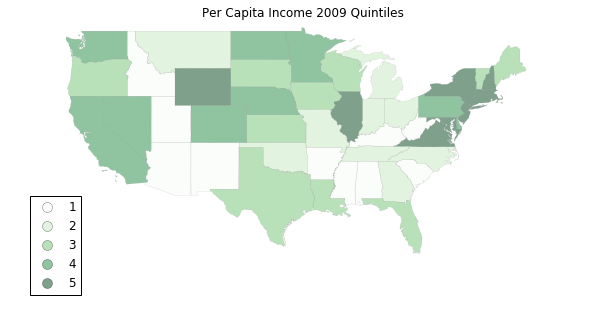

In [64]:
for y in range(1929, 2010,10):
    pciy = ps.Quantiles(pci[:,y-1929], k=5)
    f, ax = plt.subplots(1, figsize=(10, 5))
    tx.assign(cl=pciy.yb+1).plot(column='cl', categorical=True, \
            k=5, cmap='Greens', linewidth=0.1, ax=ax, \
            edgecolor='grey', legend=True)
    ax.set_axis_off()
    plt.title("Per Capita Income %d Quintiles"%(y))
    plt.show()

Put series into cross-sectional quintiles (i.e., quintiles for each year).

In [65]:
q5 = np.array([ps.Quantiles(y).yb for y in pci.T]).transpose()

In [66]:
q5.shape

(48, 81)

In [67]:
q5[:,0]

array([3, 2, 2, 0, 1, 3, 3, 1, 2, 2, 3, 3, 2, 4, 2, 4, 3, 4, 4, 4, 2, 4, 2,
       4, 3, 4, 4, 1, 3, 2, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 4])

In [68]:
pci.shape

(48, 81)

In [69]:
pci[0]

array([  741,   658,   534,   402,   376,   443,   490,   569,   599,
         582,   614,   658,   864,  1196,  1469,  1527,  1419,  1401,
        1504,  1624,  1595,  1721,  1874,  1973,  2066,  2077,  2116,
        2172,  2262,  2281,  2380,  2436,  2535,  2680,  2735,  2858,
        3078,  3385,  3566,  3850,  4097,  4205,  4381,  4731,  5312,
        5919,  6533,  7181,  7832,  8887,  9965, 10913, 11903, 12431,
       13124, 14021, 14738, 15522, 16300, 17270, 18670, 20026, 20901,
       21917, 22414, 23119, 23878, 25287, 26817, 28632, 30392, 31528,
       32053, 32206, 32934, 34984, 35738, 38477, 40782, 41588, 40619])

we are looping over the rows of y which is ordered $T \times n$ (rows are cross sections, row 0 is the cross-section for period 0.

In [70]:
m5 = ps.Markov(q5)

In [71]:
m5.classes

array([0, 1, 2, 3, 4])

In [72]:
m5.transitions

array([[ 729.,   71.,    1.,    0.,    0.],
       [  72.,  567.,   80.,    3.,    0.],
       [   0.,   81.,  631.,   86.,    2.],
       [   0.,    3.,   86.,  573.,   56.],
       [   0.,    0.,    1.,   57.,  741.]])

In [73]:
np.set_printoptions(3, suppress=True)
m5.p

matrix([[ 0.91 ,  0.089,  0.001,  0.   ,  0.   ],
        [ 0.1  ,  0.785,  0.111,  0.004,  0.   ],
        [ 0.   ,  0.101,  0.789,  0.107,  0.003],
        [ 0.   ,  0.004,  0.12 ,  0.798,  0.078],
        [ 0.   ,  0.   ,  0.001,  0.071,  0.927]])

In [74]:
m5.steady_state #steady state distribution

matrix([[ 0.208],
        [ 0.187],
        [ 0.207],
        [ 0.188],
        [ 0.209]])

In [75]:
fmpt = ps.ergodic.fmpt(m5.p) #first mean passage time
fmpt

matrix([[   4.814,   11.503,   29.609,   53.386,  103.598],
        [  42.048,    5.34 ,   18.745,   42.5  ,   92.713],
        [  69.258,   27.211,    4.821,   25.272,   75.433],
        [  84.907,   42.859,   17.181,    5.313,   51.61 ],
        [  98.413,   56.365,   30.66 ,   14.212,    4.776]])

For a state with income in the first quintile, it takes on average 11.5 years for it to first enter the second quintile, 29.6 to get to the third quintile, 53.4 years to enter the fourth, and 103.6 years to reach the richest quintile.

But, this approach assumes the movement of a state in the income distribution is independent of the movement of its neighbors or the position of the neighbors in the distribution. Does spatial context matter?

## Dynamics of Spatial Dependence

Create a queen contiguity matrix that is row standardized

In [76]:
w = ps.queen_from_shapefile(ps.examples.get_path('us48.shp'))
w.transform = 'R'

In [77]:
mits = [ps.Moran(cs, w) for cs in RY.T]

In [78]:
res = np.array([(m.I, m.EI, m.p_sim, m.z_sim) for m in mits])

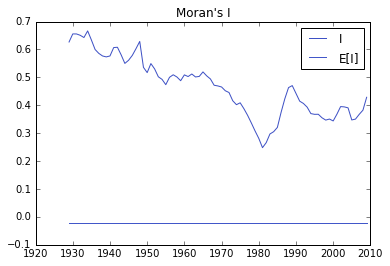

In [79]:
plt.plot(years, res[:,0], label='I')
plt.plot(years, res[:,1], label='E[I]')
plt.title("Moran's I")
plt.legend()

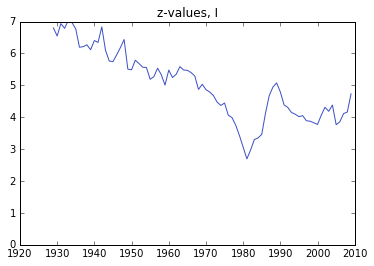

In [80]:
plt.plot(years, res[:,-1])
plt.ylim(0,7.0)
plt.title('z-values, I')

## Spatial Markov

In [81]:
pci.shape

(48, 81)

In [82]:
rpci = pci / pci.mean(axis=0)

In [83]:
rpci[:,0]

array([ 1.204,  0.962,  0.977,  0.621,  0.692,  1.097,  1.094,  0.824,
        1.031,  0.974,  1.086,  1.115,  0.944,  1.473,  0.969,  1.873,
        1.255,  1.664,  1.421,  1.492,  0.987,  1.411,  0.896,  1.611,
        1.253,  1.541,  1.677,  0.748,  1.248,  1.031,  0.639,  0.865,
        0.705,  1.009,  0.975,  0.74 ,  0.54 ,  0.614,  0.779,  0.666,
        0.525,  0.465,  0.564,  0.441,  0.504,  0.673,  0.842,  1.284])

In [84]:
rpci[:,0].mean()

0.99999999999999989

In [85]:
sm = ps.Spatial_Markov(rpci, W, fixed=True, k=5)

In [86]:
sm.p

matrix([[ 0.915,  0.075,  0.009,  0.001,  0.   ],
        [ 0.066,  0.827,  0.105,  0.001,  0.001],
        [ 0.005,  0.103,  0.794,  0.095,  0.003],
        [ 0.   ,  0.009,  0.094,  0.849,  0.048],
        [ 0.   ,  0.   ,  0.   ,  0.062,  0.938]])

In [87]:
for p in sm.P:
    print(p)

[[ 0.963  0.03   0.006  0.     0.   ]
 [ 0.06   0.832  0.107  0.     0.   ]
 [ 0.     0.14   0.74   0.12   0.   ]
 [ 0.     0.036  0.321  0.571  0.071]
 [ 0.     0.     0.     0.167  0.833]]
[[ 0.798  0.168  0.034  0.     0.   ]
 [ 0.075  0.882  0.042  0.     0.   ]
 [ 0.005  0.07   0.866  0.059  0.   ]
 [ 0.     0.     0.064  0.902  0.034]
 [ 0.     0.     0.     0.194  0.806]]
[[ 0.847  0.153  0.     0.     0.   ]
 [ 0.081  0.789  0.129  0.     0.   ]
 [ 0.005  0.098  0.793  0.098  0.005]
 [ 0.     0.     0.094  0.871  0.035]
 [ 0.     0.     0.     0.102  0.898]]
[[ 0.885  0.098  0.     0.016  0.   ]
 [ 0.039  0.814  0.14   0.     0.008]
 [ 0.005  0.094  0.777  0.119  0.005]
 [ 0.     0.023  0.129  0.754  0.094]
 [ 0.     0.     0.     0.097  0.903]]
[[ 0.333  0.667  0.     0.     0.   ]
 [ 0.048  0.774  0.161  0.016  0.   ]
 [ 0.011  0.161  0.747  0.08   0.   ]
 [ 0.     0.01   0.062  0.896  0.031]
 [ 0.     0.     0.     0.024  0.976]]


In [88]:
sm.S

array([[ 0.435,  0.264,  0.204,  0.068,  0.029],
       [ 0.134,  0.34 ,  0.252,  0.233,  0.041],
       [ 0.121,  0.211,  0.264,  0.29 ,  0.114],
       [ 0.078,  0.197,  0.254,  0.225,  0.247],
       [ 0.018,  0.2  ,  0.19 ,  0.255,  0.337]])

In [89]:
for f in sm.F:
    print(f)

[[   2.298   28.956   46.143   80.81   279.429]
 [  33.865    3.795   22.571   57.238  255.857]
 [  43.602    9.737    4.911   34.667  233.286]
 [  46.629   12.763    6.257   14.616  198.619]
 [  52.629   18.763   12.257    6.      34.103]]
[[   7.468    9.706   25.768   74.531  194.234]
 [  27.767    2.942   24.971   73.735  193.438]
 [  53.575   28.484    3.976   48.763  168.467]
 [  72.036   46.946   18.462    4.284  119.703]
 [  77.179   52.089   23.604    5.143   24.276]]
[[   8.248    6.533   18.388   40.709  112.767]
 [  47.35     4.731   11.854   34.175  106.234]
 [  69.423   24.767    3.795   22.321   94.38 ]
 [  83.723   39.067   14.3      3.447   76.367]
 [  93.523   48.867   24.1      9.8      8.793]]
[[  12.88    13.348   19.834   28.473   55.824]
 [  99.461    5.064   10.545   23.051   49.689]
 [ 117.768   23.037    3.944   15.084   43.579]
 [ 127.898   32.439   14.569    4.448   31.631]
 [ 138.248   42.789   24.919   10.35     4.056]]
[[  56.282    1.5     10.572   27.02

In [90]:
sm.summary()

--------------------------------------------------------------
                     Spatial Markov Test                      
--------------------------------------------------------------
Number of classes: 5
Number of transitions: 3840
Number of regimes: 5
Regime names: LAG0, LAG1, LAG2, LAG3, LAG4
--------------------------------------------------------------
   Test                   LR                Chi-2
  Stat.              170.659              200.624
    DOF                   60                   60
p-value                0.000                0.000
--------------------------------------------------------------
P(H0)           C0         C1         C2         C3         C4
     C0      0.915      0.075      0.009      0.001      0.000
     C1      0.066      0.827      0.105      0.001      0.001
     C2      0.005      0.103      0.794      0.095      0.003
     C3      0.000      0.009      0.094      0.849      0.048
     C4      0.000      0.000      0.000      0.062      